In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.decomposition import TruncatedSVD


In [2]:
songs = pd.read_csv("../songs_plus_dates.csv")

In [10]:
songs = songs[songs.Genre1 != "Pop"]
songs = songs[songs.Genre1 != "Rock"]
songs

Unnamed: 0                                        song  date  \
291           291                          Dimming Of The Day  2012   
292           292                 Dreaming My Dreams With You  1999   
293           293                               Foolish Heart  1987   
294           294                          If I Give My Heart  1987   
295           295                    In The Palm Of Your Hand  1995   
...           ...                                         ...   ...   
15801       15801  Tie A Yellow Ribbon Round The Old Oak Tree  2001   
15802       15802                        To Love The Language  1994   
15803       15803               When My Heart Finds Christmas  1993   
15804       15804                           Whisper Your Name  1994   
15805       15805                            With Imagination  1991   

                   artist                                               text  \
291         Alison Krauss  this old house is falling down around my ears ...   
292         Alison Krauss  i hope that i won't be that wrong anymore  i h...   
293         Alison Krauss  i think i'll take my foolish heart  my friend ...   
294         Alison Krauss  if i give my heart to you tonight  will you st...   
295         Alison Krauss  if i could have the world and all it owns  a t...   
...                   ...                                                ...   
15801  Harry Connick, Jr.  i'm comin home i done my time now i got to kno...   
15802  Harry Connick, Jr.  i is just what i was   and am ain't who i be. ...   
15803  Harry Connick, Jr.  in my eyes are valentines  and easter eggs and...   
15804  Harry Connick, Jr.  somebody was spreading rumors  'bout better da...   
15805  Harry Connick, Jr.  i've travelled many a mile  and i haven't foun...   

                       Genre1 Genre2  number_of_tokens  \
291    Folk, World, & Country   Rock               809   
292    Folk, World, & Country   Rock               652   
293    Folk, World, & Country   Rock              1072   
294    Folk, World, & Country   Rock               770   
295    Folk, World, & Country   Rock              1027   
...                       ...    ...               ...   
15801                    Jazz    Pop              1110   
15802                    Jazz    Pop               811   
15803                    Jazz    Pop               524   
15804                    Jazz    Pop               644   
15805                    Jazz    Pop              1214   

                                            stemmed_text  \
291     thi old hous is fall down around my ear I 'm ...   
292     I hope that I wo n't be that wrong anymor I h...   
293     I think I 'll take my foolish heart , my frie...   
294     If I give my heart to you tonight will you st...   
295     If I could have the world and all it own A th...   
...                                                  ...   
15801   I 'm comin home I done my time now I got to k...   
15802   I is just what I wa , and am ai n't who I be ...   
15803   In my eye are valentin and easter egg and new...   
15804   somebodi wa spread rumor 'bout better day a c...   
15805   I 've travel mani a mile and I have n't found...   

                                                     POS  
291    old broken broken house river will dimming day...  
292    wrong time way mind love hope hope hope find '...  
293    foolish only blue true deep extra many many bl...  
294    ours faded ours ours heart tonight side mornin...  
295    only selfish little rich poor free rich poor w...  
...                                                  ...  
15801  free yellow ole long ole yellow ole key simple...  
15802  good sweet live language language mama somethi...  
15803  new new kind easter year wine heart heart time...  
15804  same own own true only lonely Somebody comin n...  
15805  own strong next strong harsh holy weary weary ...  

[3723 rows x 10 columns]

### Silhouetten-Koeffizient

In [ ]:
from sklearn.metrics import silhouette_score
metric_silhouette = []
for n in range(1, 7):
    model = KMeans(n_clusters=n)
    model.fit(data)
    if n > 1:  #silhouette_score needs at least 2 cluster to work
        metric_silhouette.append(silhouette_score(data, model.labels_))


        plt.title('Silhouetten-Koeffizient')
plt.plot(range(2,7), metric_silhouette);

### KMeans

In [12]:
data = songs['text']
tf_idf_vectorizer = TfidfVectorizer()
tf_idf = tf_idf_vectorizer.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(tf_idf_array)
prediction = kmeans.predict(tf_idf_array)

In [14]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

Text(0.5, 1.0, 'PCA')

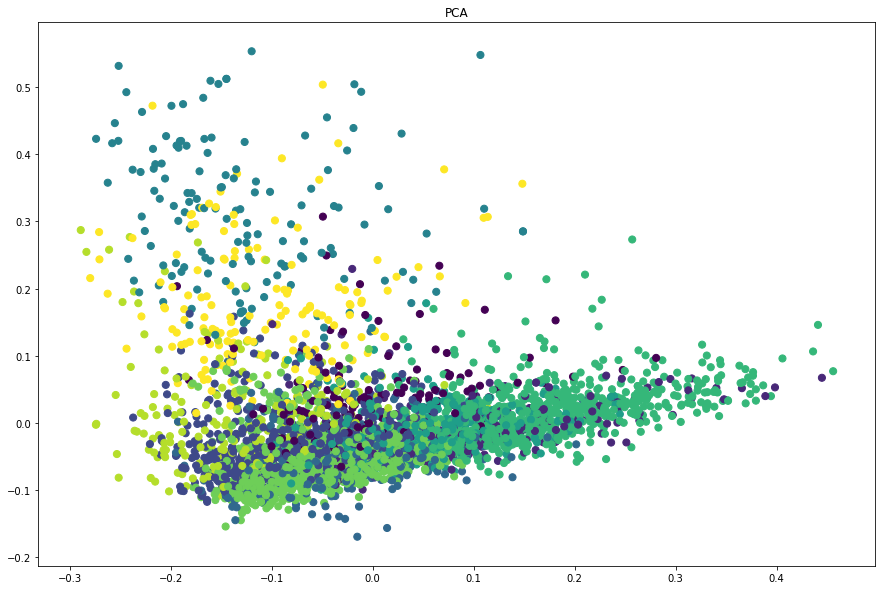

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.title('PCA')
# plt.savefig('K_Means/PCA_K-Means_POS.png', bbox_inches = "tight")

In [ ]:
markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X')
plt.figure(figsize=(15,10))
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1],hue=prediction, style=df.Genre1, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))

plt.title('TSNE')
plt.savefig('kmeans_tsne_genremarkers.png')